# NAIVE BAYES on different Vectorization Techniques on Donar Choose Dataset

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import pickle
from tqdm import tqdm
import os

from chart_studio import plotly
# import plotly.offline as offline
import plotly.graph_objs as go
from collections import Counter

## 1. Loading Data

In [2]:
import pandas as pd
data  = pd.read_csv('preprocessed_data.csv', nrows=50000)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
    
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)
print('**'*50)

(33500, 8) (33500,)
(16500, 8) (16500,)
****************************************************************************************************


<h2>2. Make Data Model Ready</h2>

<h3> 2.1 Encoding Textual Features using BAG OF WORDS</h3>

In [4]:

# encoding essay attribute using count vectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_essay_bow=vectorizer.transform(X_train['essay'].values)
X_test_essay_bow=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_bow.shape,y_train.shape)
print("test feature --",X_test_essay_bow.shape,y_test.shape)
# print('the features are : ',essay_feature_bow)
print('**'*50)

# encoding school_state using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_bow=vectorizer.get_feature_names()
X_train_school_state_bow=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_bow=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_bow.shape,y_train.shape)
print("test feature --",X_test_school_state_bow.shape,y_test.shape)
print('the features are : ',school_state_feature_bow)
print('**'*50)

#encoding teacher_prefix using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_bow=vectorizer.get_feature_names()
X_train_teacher_prefix_bow=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_bow=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_bow.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_bow.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_bow)
print('**'*50)

#encoding project_grade_category using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_bow=vectorizer.get_feature_names()
X_train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_bow.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_bow.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_bow)
print('**'*50)

#encoding clean_categories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_bow=vectorizer.get_feature_names()
X_train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_categories_bow.shape,y_test.shape)
print('the features are : ',clean_categories_feature_bow)
print('**'*50)

#encoding clean_subcategories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_bow=vectorizer.get_feature_names()
X_train_clean_subcategories_bow=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_bow=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_bow.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_bow)
print('**'*50)




 after encoding in bow the size of :
 train feature -- (33500, 5000) (33500,)
test feature -- (16500, 5000) (16500,)
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
*************************************************************************

<h3>2.2 Encoding Text features using TFIDF </h2>

In [5]:

# encoding essay attribute using count vectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_feature_TF=vectorizer.get_feature_names()
X_train_essay_TF=vectorizer.transform(X_train['essay'].values)
X_test_essay_TF=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_TF.shape,y_train.shape)
print("test feature --",X_test_essay_TF.shape,y_test.shape)
# print('the features are : ',essay_feature_bow)
print('**'*50)

# encoding school_state using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_TF=vectorizer.get_feature_names()
X_train_school_state_TF=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_TF=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_TF.shape,y_train.shape)
print("test feature --",X_test_school_state_TF.shape,y_test.shape)
print('the features are : ',school_state_feature_TF)
print('**'*50)

#encoding teacher_prefix using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_TF=vectorizer.get_feature_names()
X_train_teacher_prefix_TF=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_TF=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_TF.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_TF.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_TF)
print('**'*50)

#encoding project_grade_category using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_TF=vectorizer.get_feature_names()
X_train_project_grade_category_TF=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_TF=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_TF.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_TF.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_TF)
print('**'*50)

#encoding clean_categories using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_TF=vectorizer.get_feature_names()
X_train_clean_categories_TF=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_TF=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_categories_TF.shape,y_test.shape)
print('the features are : ',clean_categories_feature_TF)
print('**'*50)

#encoding clean_subcategories using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_TF=vectorizer.get_feature_names()
X_train_clean_subcategories_TF=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_TF=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_TF.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_TF)
print('**'*50)




 after encoding in bow the size of :
 train feature -- (33500, 5000) (33500,)
test feature -- (16500, 5000) (16500,)
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
*************************************************************************

<h3>2.3 Encoding numerical features using Normalizer</h2>

In [6]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm=normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_price_norm.shape,y_train.shape)
print("test feature --",X_test_price_norm.shape,y_test.shape)
print('**'*50)


normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_teacher_number_of_previously_posted_projects_norm.shape,y_train.shape)
print("test feature --",X_test_teacher_number_of_previously_posted_projects_norm.shape,y_test.shape)
print('**'*50)



 after encoding using normalizer the size of :
 train feature -- (33500, 1) (33500,)
test feature -- (16500, 1) (16500,)
****************************************************************************************************
 after encoding using normalizer the size of :
 train feature -- (33500, 1) (33500,)
test feature -- (16500, 1) (16500,)
****************************************************************************************************


### 2.4 Final Data Preparation- merging all the vectorized features

In [7]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_BOW = hstack((X_train_essay_bow, X_train_school_state_bow, X_train_teacher_prefix_bow, X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_BOW = hstack((X_test_essay_bow, X_test_school_state_bow, X_test_teacher_prefix_bow, X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_BOW.shape, y_train.shape)
print(X_test_BOW.shape, y_test.shape)
print('**'*50)

X_train_TFIDF = hstack((X_train_essay_TF, X_train_school_state_TF, X_train_teacher_prefix_TF, X_train_project_grade_category_TF,X_train_clean_categories_TF,X_train_clean_subcategories_TF, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_TFIDF = hstack((X_test_essay_TF, X_test_school_state_TF, X_test_teacher_prefix_TF, X_test_project_grade_category_TF,X_test_clean_categories_TF,X_test_clean_subcategories_TF, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_TFIDF.shape, y_train.shape)
print(X_test_TFIDF.shape, y_test.shape)
print('**'*50)

(33500, 5101) (33500,)
(16500, 5101) (16500,)
****************************************************************************************************
(33500, 5101) (33500,)
(16500, 5101) (16500,)
****************************************************************************************************


<h2>3 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions

## Training    

### Hyper-parameter tuning on BOW features

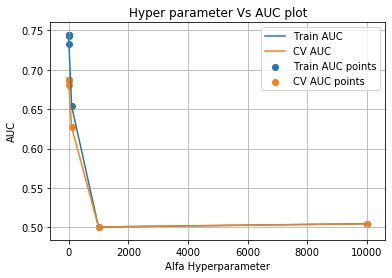

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.163707,0.009532,0.019389,0.001357,0.0001,{'alpha': 0.0001},0.685899,0.695508,0.689933,0.683829,...,0.687440,0.004816,2,0.744240,0.742061,0.742930,0.744787,0.746388,0.744081,0.001500
1,0.161706,0.008836,0.017992,0.000632,0.001,{'alpha': 0.001},0.686202,0.695502,0.689908,0.683733,...,0.687464,0.004821,1,0.744198,0.742022,0.742890,0.744765,0.746358,0.744047,0.001505
2,0.157109,0.001165,0.018191,0.000399,0.01,{'alpha': 0.01},0.686314,0.695491,0.689865,0.683599,...,0.687433,0.004847,3,0.744126,0.741957,0.742830,0.744725,0.746307,0.743989,0.001510
3,0.157307,0.003196,0.018191,0.000976,0.1,{'alpha': 0.1},0.686338,0.695404,0.689781,0.683352,...,0.687325,0.004881,4,0.743932,0.741780,0.742658,0.744588,0.746155,0.743823,0.001521
4,0.158108,0.006172,0.018190,0.000400,1,{'alpha': 1},0.685815,0.694649,0.689297,0.682411,...,0.686660,0.004902,5,0.742862,0.740668,0.741524,0.743596,0.745116,0.742753,0.001560
5,0.153309,0.000800,0.018990,0.000633,10,{'alpha': 10},0.680188,0.687300,0.683953,0.674619,...,0.680297,0.004866,6,0.732906,0.730491,0.731273,0.734170,0.735287,0.732825,0.001774
6,0.162506,0.007028,0.018390,0.001019,100,{'alpha': 100},0.630617,0.632113,0.623321,0.624077,...,0.627051,0.003600,7,0.653381,0.650276,0.654455,0.655525,0.655394,0.653806,0.001926
7,0.173699,0.002925,0.017389,0.000490,1000,{'alpha': 1000},0.501331,0.499822,0.499933,0.500288,...,0.500333,0.000533,9,0.499994,0.500388,0.500455,0.500205,0.500294,0.500267,0.000161
8,0.165703,0.010974,0.016390,0.003381,10000,{'alpha': 10000},0.506504,0.502863,0.500587,0.505758,...,0.504284,0.002228,8,0.504091,0.504776,0.505382,0.503943,0.503886,0.504416,0.000578


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
# from scipy.stats import randint as sp_randint

model = MultinomialNB()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}   # values changed to interval(10^[-4] to 10^4) as suggested
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train_BOW, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alfa Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results



In [9]:
print(clf.best_estimator_)
best_alpha_bow = clf.best_estimator_.alpha
print('the best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :- ',best_alpha_bow)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)
the best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :-  0.001


#### Hyper parameter tuning on TFIDF features

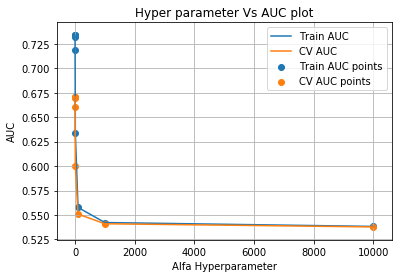

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.161874,0.013547,0.019491,2.794829e-03,0.0001,{'alpha': 0.0001},0.661381,0.680464,0.673421,0.670404,...,0.670958,0.006194,1,0.732870,0.731353,0.734320,0.734554,0.736486,0.733917,0.001723
1,0.179296,0.010377,0.017990,5.560829e-07,0.001,{'alpha': 0.001},0.661365,0.680452,0.673414,0.670395,...,0.670947,0.006196,2,0.732856,0.731339,0.734305,0.734540,0.736471,0.733902,0.001722
2,0.159305,0.003260,0.017592,4.869431e-04,0.01,{'alpha': 0.01},0.661253,0.680336,0.673355,0.670276,...,0.670852,0.006196,3,0.732716,0.731196,0.734158,0.734407,0.736332,0.733762,0.001724
3,0.167902,0.009095,0.019190,1.720601e-03,0.1,{'alpha': 0.1},0.660663,0.679221,0.672648,0.669182,...,0.669995,0.006048,4,0.731362,0.729790,0.732698,0.733074,0.734974,0.732380,0.001735
4,0.161309,0.006678,0.018188,9.787721e-04,1,{'alpha': 1},0.651999,0.668533,0.665159,0.657880,...,0.660784,0.005744,5,0.717862,0.716038,0.718325,0.719814,0.721426,0.718693,0.001822
5,0.167703,0.019167,0.019787,3.652249e-03,10,{'alpha': 10},0.594915,0.602411,0.606176,0.592003,...,0.600202,0.005725,6,0.634694,0.631277,0.631562,0.636071,0.634182,0.633557,0.001854
6,0.193887,0.006159,0.023188,2.314960e-03,100,{'alpha': 100},0.547873,0.547446,0.549319,0.545836,...,0.550889,0.006635,7,0.559569,0.557829,0.557272,0.559055,0.554544,0.557654,0.001759
7,0.176098,0.010063,0.019390,1.355722e-03,1000,{'alpha': 1000},0.540736,0.535326,0.535413,0.539907,...,0.540978,0.006650,8,0.542960,0.543433,0.543193,0.542570,0.539028,0.542237,0.001630
8,0.170901,0.002530,0.019188,1.166033e-03,10000,{'alpha': 10000},0.538314,0.531779,0.532987,0.538095,...,0.537740,0.005555,9,0.538577,0.539600,0.539255,0.538215,0.535601,0.538249,0.001411


In [10]:
model = MultinomialNB()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}  # values changed to interval(10^[-4] to 10^4) as suggested
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train_TFIDF, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alfa Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results


In [11]:
print(clf.best_estimator_)
best_alpha_tfidf = clf.best_estimator_.alpha
print('the best value of hyper-parameter alpha by Gridsearch on TFIDF Vectorization is :- ',best_alpha_tfidf)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
the best value of hyper-parameter alpha by Gridsearch on TFIDF Vectorization is :-  0.0001


## Testing 

In [12]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

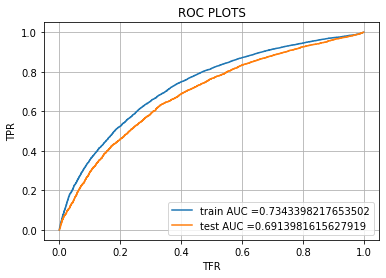

In [13]:
from sklearn.metrics import roc_curve, auc

model = MultinomialNB(alpha=best_alpha_bow)
model.fit(X_train_BOW, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_BOW = batch_predict(model, X_train_BOW)    
y_test_pred_BOW = batch_predict(model, X_test_BOW)

train_fpr_BOW, train_tpr_BOW, train_thresholds_BOW = roc_curve(y_train, y_train_pred_BOW)
test_fpr_BOW, test_tpr_BOW, test_thresholds_BOW = roc_curve(y_test, y_test_pred_BOW)

plt.plot(train_fpr_BOW, train_tpr_BOW, label="train AUC ="+str(auc(train_fpr_BOW, train_tpr_BOW)))
plt.plot(test_fpr_BOW, test_tpr_BOW, label="test AUC ="+str(auc(test_fpr_BOW, test_tpr_BOW)))
AUC_BOW=auc(test_fpr_BOW, test_tpr_BOW)
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

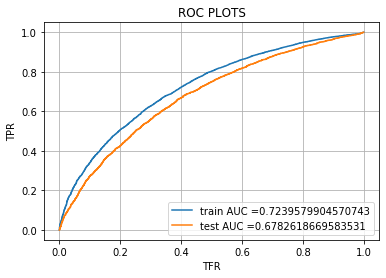

In [14]:
from sklearn.metrics import roc_curve, auc

model = MultinomialNB(alpha=best_alpha_tfidf)
model.fit(X_train_TFIDF, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_TFIDF = batch_predict(model, X_train_TFIDF)    
y_test_pred_TFIDF = batch_predict(model, X_test_TFIDF)

train_fpr_TFIDF, train_tpr_TFIDF, train_thresholds_TFIDF = roc_curve(y_train, y_train_pred_TFIDF)
test_fpr_TFIDF, test_tpr_TFIDF, test_thresholds_TFIDF = roc_curve(y_test, y_test_pred_TFIDF)

plt.plot(train_fpr_TFIDF, train_tpr_TFIDF, label="train AUC ="+str(auc(train_fpr_TFIDF, train_tpr_TFIDF)))
plt.plot(test_fpr_TFIDF, test_tpr_TFIDF, label="test AUC ="+str(auc(test_fpr_TFIDF, test_tpr_TFIDF)))
AUC_TFIDF=auc(test_fpr_TFIDF, test_tpr_TFIDF)     
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

In [15]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
#     print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [16]:
def plot_CF_MAT(X):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import pandas as pd
    
    df = pd.DataFrame(X, index = [0,1],columns = [0,1])
    print(df)
    print('\n')
    sns.cubehelix_palette(8)
    sns.set(font_scale=1.5)
    df.index.name = 'Actual'
    df.columns.name = 'Predicted'
    labels =  np.array([[{'TN':X[0][0]},{'FP':X[0][1]}],[{'FN':X[1][0]},{'TP':X[1][1]}]])
    fig, ax = plt.subplots()
    ax = sns.heatmap(df, annot = labels,fmt='',annot_kws={"size": 16},cbar=False,linecolor='white',linewidths=.75,cmap="PuBu")
    plt.show()


 The confusion matrix of model with BOW vectorization
************************************************************
      0     1
0  1629  1013
1  4574  9284




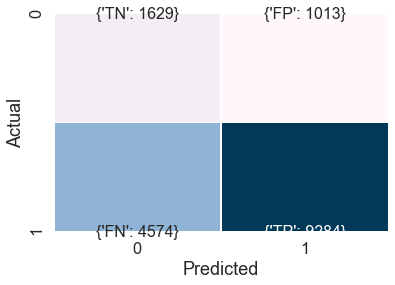

****************************************************************************************************
**************************************************************************************************** 


 The confusion matrix of model with TFIDF vectorization
************************************************************
      0     1
0  1615  1027
1  4723  9135




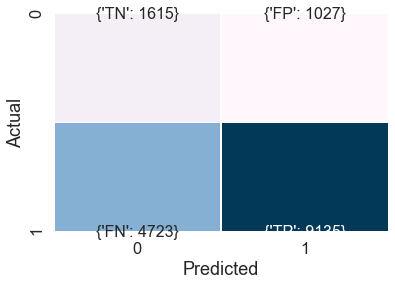

In [17]:

print (" The confusion matrix of model with BOW vectorization")
print("**"*30)
best_t = find_best_threshold(train_thresholds_BOW, train_fpr_BOW, train_tpr_BOW)
CF_MAT_BOW=confusion_matrix(y_test, predict_with_best_t(y_test_pred_BOW, best_t))
plot_CF_MAT(CF_MAT_BOW)

print("**"*50)
print("**"*50,"\n\n")


print (" The confusion matrix of model with TFIDF vectorization")
print("**"*30)
best_t = find_best_threshold(train_thresholds_TFIDF, train_fpr_TFIDF, train_tpr_TFIDF)
CF_MAT_TFIDF=confusion_matrix(y_test, predict_with_best_t(y_test_pred_TFIDF, best_t))
plot_CF_MAT(CF_MAT_TFIDF)



In [18]:
def extract_feature_names(n,d,f1,f2,f3,f4,f5,f6,prob_val):
    print('The top ',n,' features are --')
    print('**'*50)
    for i in range(n):
        if d[i] < 5000:
            print(i+1 ,": feature belongs to the ESSAY feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f1[d[i]])
        elif d[i] >= 5000 and d[i]<5051:
            print(i+1 ,": feature belongs to the SCHOOL_STATE feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f2[d[i]-5000])
        elif d[i] >= 5051 and d[i]<5056:
            print(i+1 ,": feature belongs to the TEACHER_PREFIX feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f3[d[i]-5051])
        elif d[i] >= 5056 and d[i]<5060:
            print(i+1 ,": feature belongs to the PROJECT_GRADE_CATEGORY feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f4[d[i]-5056])
        elif d[i] >= 5060 and d[i]<5069:
            print(i+1 ,": feature belongs to the CLEAN_CATEGORIES feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f5[d[i]-5060])
        elif d[i] >= 5069 and d[i]<5099:
            print(i+1 ,": feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f6[d[i]-5069])
        elif d[i] == 5099:
            print(i+1 ,": feature belongs to the PRICE feature in the data with",prob_val[d[i]],'probability ')
        else:
            print(i+1 ,": feature belongs to the PRICE feature in the data with",prob_val[d[i]],'probability ')
        
    print('**'*50)

In [19]:
# code is taken from here (https://stackoverflow.com/questions/36265930/how-to-sort-in-descending-order-with-numpy)
from numpy import argsort
prob_val = abs(model.feature_log_prob_[1]) # Probabilities related to the class label 1
feature_index=np.argsort(-prob_val)  # -prob_val for descending order
extract_feature_names(20,feature_index,essay_feature_TF,school_state_feature_TF,teacher_prefix_feature_TF,project_grade_category_feature_TF,clean_categories_feature_TF,clean_subcategories_feature_TF,prob_val)


The top  20  features are --
****************************************************************************************************
1 : feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with 13.464030908513056 probability, and the feature name after_vectorising is, warmth
2 : feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with 13.464030908513056 probability, and the feature name after_vectorising is, care_hunger
3 : feature belongs to the CLEAN_CATEGORIES feature in the data with 13.460873361739761 probability, and the feature name after_vectorising is, warmth
4 : feature belongs to the CLEAN_CATEGORIES feature in the data with 13.460873361739761 probability, and the feature name after_vectorising is, care_hunger
5 : feature belongs to the TEACHER_PREFIX feature in the data with 11.99895007024821 probability, and the feature name after_vectorising is, dr
6 : feature belongs to the ESSAY feature in the data with 10.703444812833702 probability, and the featur

<h1>3. Summary</h1>

In [20]:
from prettytable import PrettyTable

x = PrettyTable(["Vectorization","Model", "Hyper-parameter tuning", "Hyper-parameter" ,"AUC_SCORE"])
x.add_row([" BOW ", "MultinomialNB","GridSearchCV", best_alpha_bow, AUC_BOW])
x.add_row([" TFIDF ","MultinomialNB", "GridSearchCV", best_alpha_tfidf, AUC_TFIDF])
print(x)

+---------------+---------------+------------------------+-----------------+--------------------+
| Vectorization |     Model     | Hyper-parameter tuning | Hyper-parameter |     AUC_SCORE      |
+---------------+---------------+------------------------+-----------------+--------------------+
|      BOW      | MultinomialNB |      GridSearchCV      |      0.001      | 0.6913981615627919 |
|     TFIDF     | MultinomialNB |      GridSearchCV      |      0.0001     | 0.6782618669583531 |
+---------------+---------------+------------------------+-----------------+--------------------+
